### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [4]:
# Дано:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

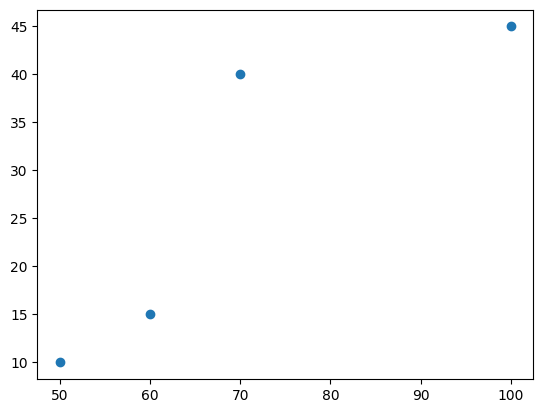

In [10]:
plt.scatter(x_hw, y_hw)
plt.show()

In [16]:
x = np.array([[1, 50], [1, 60], [1, 70], [1, 100]])
y = np.array(y_hw)[:, np.newaxis]
x

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [19]:
from numpy.linalg import inv

res = inv((x.T).dot(x)).dot(x.T).dot(y)
res

array([[-22.5       ],
       [  0.71428571]])

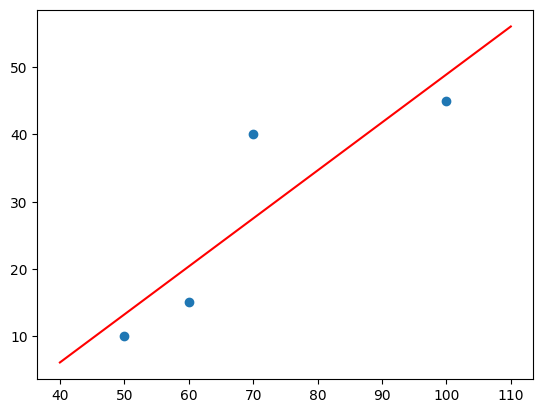

In [34]:
X = np.linspace(40, 110, num = 1000)
Y = res[0][0] + res[1][0]*X

plt.plot(X, Y, 'r')
plt.scatter(x_hw, y_hw)
plt.show()

### Домашняя работа

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [37]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

График должен получится вот такой:

![experiment_errors](https://sun9-50.userapi.com/c856120/v856120638/1e9be0/3m-6-p2kZfk.jpg)

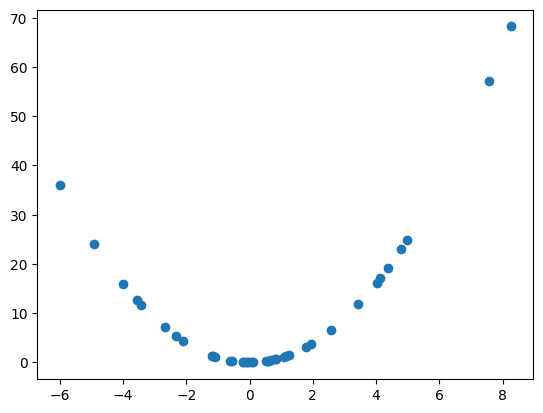

In [43]:
from matplotlib import pyplot as plt

%matplotlib inline

e = np.subtract(y_true_, y_pred_)
e2 = np.multiply(e,e)
plt.scatter(e, e2)
plt.show()

### Домашняя работа

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

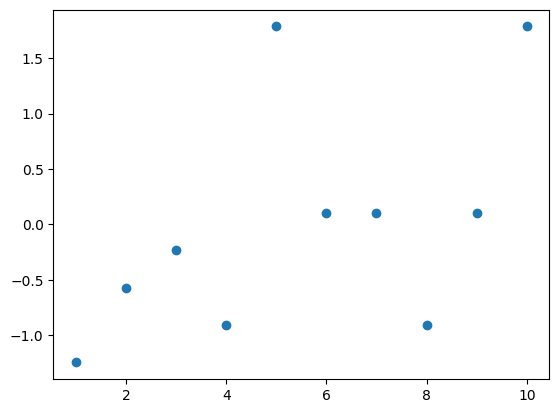

In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10)
y = np.array([1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
             dtype=np.float32)[:,np.newaxis]

y_transformed = StandardScaler().fit_transform(y)
plt.scatter(x, y_transformed)

### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
data = pd.read_csv('datasets/non_linear.csv')

In [175]:
def generate_degrees(data, degree):
    return np.array([data**n for n in range(1, degree+1)]).T

In [210]:
def train_polynomial(data, degree):
    X = generate_degrees(data['x_train'], degree)
    y = data['y_train']
    
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    err = r2_score(data['y_train'], y_pred)
#     plt.scatter(data['x_train'], data['y_train'])
#     plt.plot(data['x_train'], y_pred, 'r', linewidth=2)
    return err

In [213]:
def best_degree():
    last_err, curr_err, degree = 0, 0, 1
    while True:
        curr_err = train_polynomial(data, degree)
        if curr_err < last_err:
            print(f'Лучшая ошибка - {last_err:.4f}, лучшая степень - {degree-1}')
            break
        last_err = curr_err
        degree+=1

best_degree()

Лучшая ошибка - 0.9164, лучшая степень - 14


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [51]:
class CustomLinearReg:
    def __init__(self):
        pass
    
    def fit(X, y):
        pass
    
    def predict(X):
        pass

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline

In [348]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv', 
    sep=',')
data.columns = data.loc[0,:]
data = data.drop(0)

In [349]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

err = r2_score(y_test, y_pred)

print(f'R2-score = {err}\nBEFORE z-score normalization')

R2-score = 0.7057189451172972
BEFORE z-score normalization


In [351]:
# Standar Scaling

from sklearn.preprocessing import StandardScaler

data = pd.read_csv(
    'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv', 
    sep=',')
data.columns = data.loc[0,:]
data = data.drop(0)

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

err = r2_score(y_test, y_pred)

print(f'R2-score = {err}\nAFTER z-score normalization')

# ЧТО-ТО ТУТ НЕ ТАК............................................

R2-score = 0.7030107245002104
AFTER z-score normalization
